# Description of the problem and a Discussion of the background

How one city is compare to another.. Can we do a comparitive study between two different cities to see if there is a business exists in one city and what would be the ideal location to open the similar business in the other city.. Can we make this exercise more generic and unify the categories into specific buckets, so that the data can be used for any kind of business.. How about putting the categories into the following buckets for both the cities, so that Kmeans clustering can do a better job in putting similar categories into same bucket...

Categories which are interested in this study as follows

* Bar
* Business
* Entertainment
* FastFood
* Kids
* Parks
* Residential
* Restaurant
* Indian Restaurant
* Services
* Shops
* SightSeeing
* Sports
* Travel


# Description of the data and How it will be used to solve the problem

Newyork data will be downloaded from the following site and cleanedup for this project. 

https://cocl.us/new_york_dataset

For Toronto, web scrapping will be done to extract the data from the following site

https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

Once we have the data available, the following approach will be used to solve the problem

* New york data will be first used and cleanedup to get only the columns of our interest and use the foursquare API to accesss the 100 items within 500 meters and later unify into the categories mentioned above and in the end, sort the list of boroughs with top 10 categories. 

* Similarly do the same assessment for Toronto data and once we have the same kind of data available for Toronto, both the tables will the put into one single table to start the K-Means analysis and analyze the K-Means and put into 2 different categories. 

* Based on the outcome of the clustering, conclusion can be arrived on which cities look similar between Toronto and Newyork.


## Importing libraries



In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Newyork Data

In [13]:
# Reading the json as a dict
import json

with open('nyu_2451_34572-geojson.json') as json_data:
    newyork_data = json.load(json_data)
    


## Taking only columns of interest

In [14]:
columns = ['Borough','Neighborhood','Lat','Lon']
nyc_df = pd.DataFrame(columns=columns)


In [15]:
for data in newyork_data['features']:
    borough = data['properties']['borough']
    neighbour = data['properties']['name']
    lat = data['properties']['bbox'][1]
    lon = data['properties']['bbox'][0]
    nyc_df = nyc_df.append(
        {'Borough':borough,
         'Neighborhood':neighbour,
         'Lat':lat,
         'Lon':lon   
        },ignore_index=True
    )


In [16]:
nyc_df.shape

(306, 4)

In [17]:
nyc_df.head()

,Borough,Neighborhood,Lat,Lon
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


## Let's visualize the data using Folium

In [18]:
import folium

In [19]:
latitude =40.730610
longitude = -73.935242
map_nyc = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat,lan,borough in zip(nyc_df.Lat,nyc_df.Lon,nyc_df.Borough):
    
    label = '{}, {}, {}'.format(lat,lan,borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lan],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_nyc)
map_nyc

## Getting Ready for Foursquare API

In [20]:
CLIENT_ID = 'IYUYZGQ1MKKUXRYJVYPIDLZ5OHJ0FZH0EW43ZDS554AJCIUB' # your Foursquare ID
CLIENT_SECRET = '3X3UA3W0VYCYVLM1LD2KP03E2J1RI4YL3BVGD0SYEWVTWFOM' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: IYUYZGQ1MKKUXRYJVYPIDLZ5OHJ0FZH0EW43ZDS554AJCIUB
CLIENT_SECRET:3X3UA3W0VYCYVLM1LD2KP03E2J1RI4YL3BVGD0SYEWVTWFOM


In [21]:
def get_100_venues(borough_latitude,borough_longitude):
    LIMIT = 100 # limit of number of venues returned by Foursquare API
    radius = 500 # define radius
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    borough_latitude, 
    borough_longitude, 
    radius, 
    LIMIT)
    return url

## Getting Interested categories as dictionaries

In [23]:
cons_category = {
    
    'Bar':  ['Beer Bar',
 'Bar',
 'Sports Bar',
 'Brewery',
 'Distillery',
 'Hookah Bar',
 'Piano Bar',
 'Dive Bar',
 'Salon / Barbershop',
 'Gastropub',
 'Cocktail Bar',
 'Beer Store',
 'Wine Shop',
 'Whisky Bar',
 'Fruit & Vegetable Store',
 'Wine Bar',
 'Karaoke Bar',
 'Jazz Club',
 'Beer Garden',
 'Tiki Bar',
 'Gay Bar',
 'Sake Bar',
 'Hotel Bar',
 'Irish Pub',
 'Beach Bar'],
    
    'Business' :[
        
         'Office',
 'Coworking Space'
 
        
    ],
    
    'Entertainment' :[
        
 'Bowling Alley',
 'Pub',
 'Nightclub',
 'Arcade',
 'Performing Arts Venue',
 'History Museum',
 'Music Venue',
 'Harbor / Marina',
 'Boat or Ferry',
 'Lounge',
 'Art Gallery',
 'Indie Theater',
 'Antique Shop',
 'Social Club',
 'Dance Studio',
 'Other Nightlife',
 'Event Space',
 'Indie Movie Theater',
 'Rock Club',
 'General Entertainment',
 'Nightlife Spot',
 'Opera House',
 'Theater',
 'Baseball Stadium',
 'Movie Theater',
 'Roof Deck',
 'Concert Hall',
 'Music Store',
 'Piercing Parlor',
 'Exhibit',
 'Club House',
 'Street Art',
 'Cultural Center',
 'College Theater',
 'Multiplex',
 'Strip Club'
        
    ],
    
    'FastFood':[
        
         'Food Truck',
'Dessert Shop',
 'Donut Shop',
 'Sandwich Place',
 'Pizza Place',
 'Fried Chicken Joint',
 'Fast Food Restaurant',
 'Bakery',
 'Gourmet Shop',
 'Burger Joint',
 'Wings Joint',
 'Breakfast Spot',
 'Café',
 'Soup Place',
 'BBQ Joint',
 'Frozen Yogurt Shop',
 'Juice Bar',
 'Fish & Chips Shop',
 'Cupcake Shop',
 'Food & Drink Shop',
 'Cheese Shop',
 'Bagel Shop',
 'Taco Place',
 'Tea Room',
 'Snack Place',
 'Butcher',
 'Noodle House',
 'Creperie',
 'Salad Place',
 'Food Stand',
 'Bistro',
 'Burrito Place',
 'Food Court',
 'Hot Dog Joint',
 'Poke Place',
 'Cafeteria',
 'College Cafeteria',
 'Smoothie Shop',
     
        
        
    ],
    
    'Kids':[
        
         'Candy Store',
 'Pet Store',
 'Video Game Store',
 'Electronics Store',
 'Video Store',
 'Pool',
 'Beach',
 'Toy / Game Store',
 'Museum',
 'Outdoors & Recreation',
 'Racetrack',
 'Used Bookstore',
 'Gaming Cafe',
 'Library',
 'School',
 'Climbing Gym',
 'Music School',
 'Public Art',
 'Daycare',
 'College Academic Building',
 'High School',
 'Circus',
 'Recreation Center',
 'Comedy Club',
 'Rock Climbing Spot',
 'General College & University',
 'Pet Café',
 'Theme Park',
 'Baby Store',
 'Laser Tag',
 'Science Museum',
       
        
    ],
    
'Parks' :[
    
     'Construction & Landscaping',
 'Art Museum',
 'Garden Center',
 'Garden',
 'Waterfront',
 'Farm',
 'Dog Run',
 'Skating Rink',
 'Sculpture Garden',
 'Fountain',
 'Community Center',
 'Gym Pool',
 'Memorial Site',
 'Auditorium',
 'Tree',
 'Botanical Garden',
 'Pier',
 'Field',
 'State / Provincial Park',
 'Campground',
 'Church',

    
    
],
    
'Residential':[
    
 'Baseball Field',
 'Basketball Court',
 'Park',
 'Convenience Store',
 'Cosmetics Shop',
 'Plaza',
 'River',
 'Playground',
 'Bank',
 'Home Service',
 'Coffee Shop',
 'Warehouse Store',
 'Trail',
 'Rental Car Location',
 'Supplement Shop',
 'Outdoor Sculpture',
 'Yoga Studio',
 'Gym',
 'Tennis Stadium',
 'Moving Target',
 'Gym / Fitness Center',
 'Track',
 'Intersection',
 'Martial Arts Dojo',
 'Pool Hall',
 'Gymnastics Gym',
 'Neighborhood',
 'Residential Building (Apartment / Condo)',
 'Building',
 'Animal Shelter',

    
],
    
    'Restaurant':[
        
         'Ice Cream Shop',
 'Caribbean Restaurant',
 'Restaurant',
 'Diner',
 'Seafood Restaurant',
 'Deli / Bodega',
 'Chinese Restaurant',
 'Latin American Restaurant',
 'Mexican Restaurant',
 'Spanish Restaurant',
 'Steakhouse',
 'American Restaurant',
 'Italian Restaurant',
 'Sushi Restaurant',
 'French Restaurant',
 'Tapas Restaurant',
 'African Restaurant',
 'Greek Restaurant',
 'Paella Restaurant',
 'Asian Restaurant',
 'Peruvian Restaurant',
 'South American Restaurant',
 'Arepa Restaurant',
 'Buffet',
 'Mediterranean Restaurant',
 'Japanese Restaurant',
 'Southern / Soul Food Restaurant',
 'Thai Restaurant',
 'Food',
 'Comfort Food Restaurant',
 'Middle Eastern Restaurant',
 'Caucasian Restaurant',
 'New American Restaurant',
 'Vietnamese Restaurant',
 'Dim Sum Restaurant',
 'Shabu-Shabu Restaurant',
 'Hotpot Restaurant',
 'Dumpling Restaurant',
 'Polish Restaurant',
 'Vegetarian / Vegan Restaurant',
 'Falafel Restaurant',
 'Ramen Restaurant',
 'Korean Restaurant',
 'Eastern European Restaurant',
 'Russian Restaurant',
 'Varenyky restaurant',
 'Turkish Restaurant',
 'Cajun / Creole Restaurant',
 'North Indian Restaurant',
 'Cuban Restaurant',
 'Pakistani Restaurant',
 'Ethiopian Restaurant',
 'Argentinian Restaurant',
 'Filipino Restaurant',
 'Israeli Restaurant',
 'German Restaurant',
 'Cantonese Restaurant',
 'Halal Restaurant',
 'Shanghai Restaurant',
 'Kebab Restaurant',
 'Hawaiian Restaurant',
 'Taiwanese Restaurant',
 'Lebanese Restaurant',
 'Jewish Restaurant',
 'English Restaurant',
 'Malay Restaurant',
 'Austrian Restaurant',
 'Japanese Curry Restaurant',
 'Czech Restaurant',
 'Afghan Restaurant',
 'Australian Restaurant',
 'South Indian Restaurant',
 'Szechuan Restaurant',
 'Brazilian Restaurant',
 'Scandinavian Restaurant',
 'Udon Restaurant',
 'Gluten-free Restaurant',
 'Moroccan Restaurant',
 'Swiss Restaurant',
 'Modern European Restaurant',
 'Belgian Restaurant',
 'Tibetan Restaurant',
 'Himalayan Restaurant',
 'Empanada Restaurant',
 'Colombian Restaurant',
 'Indonesian Restaurant',
 'Romanian Restaurant',
 'Egyptian Restaurant',
 'Kosher Restaurant',
 'Sri Lankan Restaurant',
 'Tex-Mex Restaurant',
 'Venezuelan Restaurant',
 'Molecular Gastronomy Restaurant',
 'Cambodian Restaurant',
 'Persian Restaurant',
 'Soba Restaurant',
 'Portuguese Restaurant',

        
        
    ],
    
    'Indian Restaurant':[
        
         'Indian Restaurant',
       
        
    ],
    
    'Services':[
        
         'Pharmacy',
 'Laundromat',
 'Platform',
 'Metro Station',
 'Thrift / Vintage Store',
 'Shoe Store',
 'Shipping Store',
 'Spa',
 'Mobile Phone Shop',
 'Eye Doctor',
 'Dry Cleaner',
 'Check Cashing Service',
 'Health & Beauty Service',
 'Waste Facility',
 'Business Service',
 'Tattoo Parlor',
 'Lawyer',
 'Laundry Service',
 'Speakeasy',
 'Gas Station',
 'Massage Studio',
 'Veterinarian',
 'Shoe Repair',
 'Pet Service',
 'Post Office',
 'Locksmith',
 'Storage Facility',
 'Pedestrian Plaza',
 'Weight Loss Center',
 'IT Services',
 'Medical Center',
 'Spiritual Center',
 'Tech Startup',
 'Rental Service',

        
        
    ],
    
    'Shops':[
        
         'Discount Store',
 'Mattress Store',
 'Grocery Store',
 'Liquor Store',
 'Supermarket',
 'Department Store',
 'Big Box Store',
 'Clothing Store',
 "Men's Store",
 'Smoke Shop',
 'Jewelry Store',
 'Optical Shop',
 'Miscellaneous Shop',
 'Sporting Goods Shop',
 'Kids Store',
 'Accessories Store',
 'Outlet Store',
 'Flea Market',
 'Vape Store',
 'Market',
 'Paper / Office Supplies Store',
 'Bookstore',
 'Flower Shop',
 'Furniture / Home Store',
 'Farmers Market',
 'Fish Market',
 "Women's Store",
 'Lingerie Store',
 'Bridal Shop',
 'Other Repair Shop',
 'Record Shop',
 'Arts & Crafts Store',
 'Boutique',
 'Nail Salon',
 'Organic Grocery',
 'Non-Profit',
 'Print Shop',
 'Pie Shop',
 'Chocolate Shop',
 'Gift Shop',
 'Comic Shop',
 'Herbs & Spices Store',
 'Hardware Store',
 'Shopping Mall',
 'Bubble Tea Shop',
 'Motorcycle Shop',
 'Health Food Store',
 'Adult Boutique',
 'Board Shop',
 'Bike Shop',
 'Hobby Shop',
 'Drugstore',
 'College Bookstore',
 'Tailor Shop',
 'Watch Shop',
 'Auto Workshop',
 'Newsstand',
 'Design Studio',
 'Souvlaki Shop',
 'Shop & Service',
 'Automotive Shop',
 'Recording Studio',
 'Tanning Salon',
 'Insurance Office',
 'Camera Store',
 'Leather Goods Store',
 'Duty-free Shop',
 'Factory',

        
    ],
    
    'SightSeeing': [
         'Other Great Outdoors',
 'Lake',
 'Monument / Landmark',
 'Theme Park Ride / Attraction',
 'Surf Spot',
 'Historic Site',
 'Scenic Lookout',
 'Tourist Information Center',
    
        
        
    ],
    
    'Sports':[
         'Cycle Studio',
 'Pilates Studio',
 'Athletics & Sports',
 'Golf Course',
 'Soccer Field',
 'Boxing Gym',
 'Tennis Court',
 'Bike Rental / Bike Share',
 'Hockey Field',
 'Arts & Entertainment',
 'Bike Trail',
 'Mini Golf',
 'Volleyball Court',
 'Skate Park',
 'College Basketball Court',
 'Sports Club',

        
    ],
    
    'Travel':[
         'Bus Station',
 'Bus Stop',
 'Bus Line',
 'Train Station',
 'Airport Tram',
 'Train',
 'Toll Plaza',
 'Heliport',
 'Bridge',
 'Road',
 'Hotel',
 'Hostel',
 'Rest Area',
 'Bed & Breakfast',
 'Resort',
 'Motel',
 'Bath House',
 'Taxi Stand',
 'Hotel Pool'

        
    ]
    
}

## Getting all Venues

In [25]:
import requests
venues_list = []
for neighbour,lat,lon in zip(nyc_df.Neighborhood,nyc_df.Lat,nyc_df.Lon):
    url =get_100_venues(lat,lon)
    results = requests.get(url).json()["response"]['groups'][0]['items']
    venues_list.append([(
        neighbour,
        lat,
        lon,
        v['venue']['name'], 
        v['venue']['location']['lat'], 
        v['venue']['location']['lng'],  
        v['venue']['categories'][0]['name']) for v in results])
    print ("Doing for {}".format (neighbour))
venue_df = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
venue_df.columns = ['Neighbourhood Name','Neighbourhood Lat','Neighbourhood Lon','Venue Name','Venue Lat','Venue Lon','Venue Cat']
venue_df.info()

Doing for Wakefield
Doing for Co-op City
Doing for Eastchester
Doing for Fieldston
Doing for Riverdale
Doing for Kingsbridge
Doing for Marble Hill
Doing for Woodlawn
Doing for Norwood
Doing for Williamsbridge
Doing for Baychester
Doing for Pelham Parkway
Doing for City Island
Doing for Bedford Park
Doing for University Heights
Doing for Morris Heights
Doing for Fordham
Doing for East Tremont
Doing for West Farms
Doing for High  Bridge
Doing for Melrose
Doing for Mott Haven
Doing for Port Morris
Doing for Longwood
Doing for Hunts Point
Doing for Morrisania
Doing for Soundview
Doing for Clason Point
Doing for Throgs Neck
Doing for Country Club
Doing for Parkchester
Doing for Westchester Square
Doing for Van Nest
Doing for Morris Park
Doing for Belmont
Doing for Spuyten Duyvil
Doing for North Riverdale
Doing for Pelham Bay
Doing for Schuylerville
Doing for Edgewater Park
Doing for Castle Hill
Doing for Olinville
Doing for Pelham Gardens
Doing for Concourse
Doing for Unionport
Doing for Ed

In [33]:
v_df = venue_df

## Putting into one hot category

In [34]:
allvenues_onehot = pd.get_dummies(v_df, columns = ['Venue Cat'], prefix="", prefix_sep="")
allvenues_onehot = allvenues_onehot.drop('Venue Name',axis = 1)
allvenues_onehot.head()

,Neighbourhood Name,Neighbourhood Lat,Neighbourhood Lon,Venue Lat,Venue Lon,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,...,Watch Shop,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,Wakefield,40.894705,-73.847201,40.894123,-73.845892,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Wakefield,40.894705,-73.847201,40.896649,-73.844846,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Wakefield,40.894705,-73.847201,40.890487,-73.848568,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Wakefield,40.894705,-73.847201,40.890631,-73.849027,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Wakefield,40.894705,-73.847201,40.898276,-73.850381,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Extracting the list of interested from the created dictionary

In [35]:
list_of_interests = ['Neighbourhood Name']
for key in cons_category:
    list_of_interests.append(key)
print( list_of_interests)

['Neighbourhood Name', 'Bar', 'Business', 'Entertainment', 'FastFood', 'Kids', 'Parks', 'Residential', 'Restaurant', 'Indian Restaurant', 'Services', 'Shops', 'SightSeeing', 'Sports', 'Travel']


## Extracting dataframe with list of interests

In [36]:
def combine_columns(columns,newcolumnname,dataframe,others=0):
    value = 0
    if others ==1:
        
        for column in dataframe.columns:
            if column not in columns:
                value = dataframe[column]+value
                #dataframe = dataframe.drop(column,axis=1)
            else:
                continue
        dataframe[newcolumnname] = value
    else:
        for column in columns:
            if column in dataframe.columns:
                print("Now Doing for {}".format(column))
                value = dataframe[column]+ value
            else:
                columns.remove(column)
        dataframe = dataframe.drop(columns,axis=1)
        dataframe[newcolumnname] = value
    return dataframe

In [37]:
allvenues_onehot = combine_columns(cons_category['Bar'],'Bar',allvenues_onehot)
allvenues_onehot = combine_columns(cons_category['Business'],'Business',allvenues_onehot)
allvenues_onehot = combine_columns(cons_category['Entertainment'],'Entertainment',allvenues_onehot)
allvenues_onehot = combine_columns(cons_category['FastFood'],'FastFood',allvenues_onehot)
allvenues_onehot = combine_columns(cons_category['Kids'],'Kids',allvenues_onehot)
allvenues_onehot = combine_columns(cons_category['Parks'],'Parks',allvenues_onehot)
allvenues_onehot = combine_columns(cons_category['Residential'],'Residential',allvenues_onehot)
allvenues_onehot = combine_columns(cons_category['Restaurant'],'Restaurant',allvenues_onehot)
allvenues_onehot = combine_columns(cons_category['Services'],'Services',allvenues_onehot)
allvenues_onehot = combine_columns(cons_category['Shops'],'Shops',allvenues_onehot)
allvenues_onehot = combine_columns(cons_category['SightSeeing'],'SightSeeing',allvenues_onehot)
allvenues_onehot = combine_columns(cons_category['Sports'],'Sports',allvenues_onehot)
allvenues_onehot = combine_columns(cons_category['Travel'],'Travel',allvenues_onehot)
allvenues_onehot.head()

Now Doing for Beer Bar
Now Doing for Bar
Now Doing for Sports Bar
Now Doing for Brewery
Now Doing for Distillery
Now Doing for Hookah Bar
Now Doing for Piano Bar
Now Doing for Dive Bar
Now Doing for Salon / Barbershop
Now Doing for Gastropub
Now Doing for Cocktail Bar
Now Doing for Beer Store
Now Doing for Wine Shop
Now Doing for Whisky Bar
Now Doing for Fruit & Vegetable Store
Now Doing for Wine Bar
Now Doing for Karaoke Bar
Now Doing for Jazz Club
Now Doing for Beer Garden
Now Doing for Tiki Bar
Now Doing for Gay Bar
Now Doing for Sake Bar
Now Doing for Hotel Bar
Now Doing for Irish Pub
Now Doing for Beach Bar
Now Doing for Office
Now Doing for Coworking Space
Now Doing for Bowling Alley
Now Doing for Pub
Now Doing for Nightclub
Now Doing for Arcade
Now Doing for Performing Arts Venue
Now Doing for History Museum
Now Doing for Music Venue
Now Doing for Harbor / Marina
Now Doing for Boat or Ferry
Now Doing for Lounge
Now Doing for Art Gallery
Now Doing for Indie Theater
Now Doing for 

,Neighbourhood Name,Neighbourhood Lat,Neighbourhood Lon,Venue Lat,Venue Lon,Airport Terminal,Child Care Service,Chiropractor,College Gym,Event Service,...,FastFood,Kids,Parks,Residential,Restaurant,Services,Shops,SightSeeing,Sports,Travel
0,Wakefield,40.894705,-73.847201,40.894123,-73.845892,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Wakefield,40.894705,-73.847201,40.896649,-73.844846,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Wakefield,40.894705,-73.847201,40.890487,-73.848568,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Wakefield,40.894705,-73.847201,40.890631,-73.849027,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,Wakefield,40.894705,-73.847201,40.898276,-73.850381,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Putting into one hot categories with list of interests

In [38]:
allvenues_onehot = allvenues_onehot[list_of_interests]
allvenues_onehot.head()

,Neighbourhood Name,Bar,Business,Entertainment,FastFood,Kids,Parks,Residential,Restaurant,Indian Restaurant,Services,Shops,SightSeeing,Sports,Travel
0,Wakefield,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Wakefield,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,Wakefield,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Wakefield,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Wakefield,0,0,0,0,0,0,0,1,0,0,0,0,0,0


## Grouping based on NYC Neighborhood

In [40]:
allvenues_grouped = allvenues_onehot.groupby('Neighbourhood Name',axis = 0).sum().reset_index()
allvenues_grouped

,Neighbourhood Name,Bar,Business,Entertainment,FastFood,Kids,Parks,Residential,Restaurant,Indian Restaurant,Services,Shops,SightSeeing,Sports,Travel
0,Allerton,0,0,0,8,0,0,3,6,0,3,4,0,0,2
1,Annadale,1,0,1,2,0,0,2,4,0,0,0,0,0,1
2,Arden Heights,0,0,0,1,1,0,1,0,0,1,0,0,0,0
3,Arlington,0,0,0,0,0,0,2,2,0,0,0,0,0,1
4,Arrochar,0,0,0,5,1,0,1,7,0,0,2,0,0,3
5,Arverne,1,0,0,3,1,0,1,1,0,2,1,4,0,2
6,Astoria,18,0,2,22,0,0,8,38,2,2,8,0,0,0
7,Astoria Heights,0,0,1,4,0,0,2,5,0,0,1,0,0,3
8,Auburndale,2,0,0,3,2,0,0,5,0,2,4,0,1,1
9,Bath Beach,1,0,0,10,2,0,4,19,0,4,9,1,1,0


## Adding Borough information

In [41]:
allvenue_withborough = nyc_df.join(allvenues_grouped.set_index('Neighbourhood Name'), on='Neighborhood')

In [42]:
allvenue_withborough.head()

,Borough,Neighborhood,Lat,Lon,Bar,Business,Entertainment,FastFood,Kids,Parks,Residential,Restaurant,Indian Restaurant,Services,Shops,SightSeeing,Sports,Travel
0,Bronx,Wakefield,40.894705,-73.847201,0,0,0,4,0,0,0,2,0,2,0,0,0,0
1,Bronx,Co-op City,40.874294,-73.829939,0,0,0,2,0,0,4,2,0,1,5,0,0,2
2,Bronx,Eastchester,40.887556,-73.827806,0,0,1,5,0,0,2,9,0,2,0,0,0,4
3,Bronx,Fieldston,40.895437,-73.905643,0,0,0,0,0,0,3,0,0,0,0,0,0,0
4,Bronx,Riverdale,40.890834,-73.912585,0,0,0,1,0,0,5,0,0,0,0,0,0,1


# Top 10 items in every neighbourhood

In [43]:
allvenues_grouped.head()

,Neighbourhood Name,Bar,Business,Entertainment,FastFood,Kids,Parks,Residential,Restaurant,Indian Restaurant,Services,Shops,SightSeeing,Sports,Travel
0,Allerton,0,0,0,8,0,0,3,6,0,3,4,0,0,2
1,Annadale,1,0,1,2,0,0,2,4,0,0,0,0,0,1
2,Arden Heights,0,0,0,1,1,0,1,0,0,1,0,0,0,0
3,Arlington,0,0,0,0,0,0,2,2,0,0,0,0,0,1
4,Arrochar,0,0,0,5,1,0,1,7,0,0,2,0,0,3


In [44]:
neighbourlist = allvenues_grouped['Neighbourhood Name']
top_ten_list =[]
for neighbour in neighbourlist:

    temp = allvenues_grouped[allvenues_grouped['Neighbourhood Name']==neighbour].T.reset_index()
    temp.columns=['Neighbor','Frequency']
    temp = temp.iloc[1:]
    temp.sort_values('Frequency',ascending=False,inplace=True)
    top_ten_list.append(["{} ({})" .format(t[0],t[1]) for t in temp[:10].values])
top_ten_list
df_top_ten = pd.DataFrame(top_ten_list)
df_top_ten.columns = ['#1 Favourite','#2 Favourite','#3 Favourite','#4 Favourite','#5 Favourite','#6 Favourite','#7 Favourite','#8 Favourite','#9Favourite','#10 Favourite',]
df_top_ten.set_index(neighbourlist,inplace=True)
df_top_ten.reset_index()

,Neighbourhood Name,#1 Favourite,#2 Favourite,#3 Favourite,#4 Favourite,#5 Favourite,#6 Favourite,#7 Favourite,#8 Favourite,#9Favourite,#10 Favourite
0,Allerton,FastFood (8),Restaurant (6),Shops (4),Residential (3),Services (3),Travel (2),Bar (0),Business (0),Entertainment (0),Kids (0)
1,Annadale,Restaurant (4),FastFood (2),Residential (2),Bar (1),Entertainment (1),Travel (1),Business (0),Kids (0),Parks (0),Indian Restaurant (0)
2,Arden Heights,FastFood (1),Kids (1),Residential (1),Services (1),Bar (0),Business (0),Entertainment (0),Parks (0),Restaurant (0),Indian Restaurant (0)
3,Arlington,Residential (2),Restaurant (2),Travel (1),Bar (0),Business (0),Entertainment (0),FastFood (0),Kids (0),Parks (0),Indian Restaurant (0)
4,Arrochar,Restaurant (7),FastFood (5),Travel (3),Shops (2),Kids (1),Residential (1),Bar (0),Business (0),Entertainment (0),Parks (0)
5,Arverne,SightSeeing (4),FastFood (3),Services (2),Travel (2),Bar (1),Kids (1),Residential (1),Restaurant (1),Shops (1),Business (0)
6,Astoria,Restaurant (38),FastFood (22),Bar (18),Residential (8),Shops (8),Entertainment (2),Indian Restaurant (2),Services (2),Business (0),Kids (0)
7,Astoria Heights,Restaurant (5),FastFood (4),Travel (3),Residential (2),Entertainment (1),Shops (1),Bar (0),Business (0),Kids (0),Parks (0)
8,Auburndale,Restaurant (5),Shops (4),FastFood (3),Bar (2),Kids (2),Services (2),Sports (1),Travel (1),Business (0),Entertainment (0)
9,Bath Beach,Restaurant (19),FastFood (10),Shops (9),Residential (4),Services (4),Kids (2),Bar (1),SightSeeing (1),Sports (1),Business (0)


# Let's do the same analysis for Toronto

In [45]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [46]:
page = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
soup = BeautifulSoup(page.text, 'html.parser')

In [47]:
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))

In [48]:
new_df=df[0]


In [50]:
df = new_df

In [51]:
df =df[df.Borough != 'Not assigned']


In [52]:
df=df.groupby([df.Postcode,df.Borough],as_index=False).agg(', '.join)
df = df.rename(columns={'Postcode': 'Postal Code'})
df.head()

,Postal Code,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [53]:
df['Neighbourhood'] = np.where(df['Neighbourhood']=='Not assigned', df['Borough'], df['Neighbourhood'])


In [54]:
df.head()

,Postal Code,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


## Let's combine the lat and lon data from the csv file to the above table

In [55]:
gs_df = pd.read_csv('https://raw.githubusercontent.com/ksnblr/Coursera_Capstone/master/GS.csv')

In [56]:
gs_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [57]:
tor_df = gs_df.join(df.set_index('Postal Code'), on='Postal Code')

In [58]:
tor_df.head()

,Postal Code,Latitude,Longitude,Borough,Neighbourhood
0,M1B,43.806686,-79.194353,Scarborough,"Rouge, Malvern"
1,M1C,43.784535,-79.160497,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,43.763573,-79.188711,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,43.770992,-79.216917,Scarborough,Woburn
4,M1H,43.773136,-79.239476,Scarborough,Cedarbrae


# Getting All Venues in Toronto

In [59]:
tor_venues_list = []
for neighbour,lat,lon in zip(tor_df.Neighbourhood,tor_df.Latitude,tor_df.Longitude):
    url =get_100_venues(lat,lon)
    results = requests.get(url).json()["response"]['groups'][0]['items']
    tor_venues_list.append([(
        neighbour,
        lat,
        lon,
        v['venue']['name'], 
        v['venue']['location']['lat'], 
        v['venue']['location']['lng'],  
        v['venue']['categories'][0]['name']) for v in results])
    print ("Doing for {}".format (neighbour))
tor_venue_df = pd.DataFrame([item for venue_list in tor_venues_list for item in venue_list])
tor_venue_df.columns = ['Neighbourhood Name','Neighbourhood Lat','Neighbourhood Lon','Venue Name','Venue Lat','Venue Lon','Venue Cat']
tor_venue_df.head()

Doing for Rouge, Malvern
Doing for Highland Creek, Rouge Hill, Port Union
Doing for Guildwood, Morningside, West Hill
Doing for Woburn
Doing for Cedarbrae
Doing for Scarborough Village
Doing for East Birchmount Park, Ionview, Kennedy Park
Doing for Clairlea, Golden Mile, Oakridge
Doing for Cliffcrest, Cliffside, Scarborough Village West
Doing for Birch Cliff, Cliffside West
Doing for Dorset Park, Scarborough Town Centre, Wexford Heights
Doing for Maryvale, Wexford
Doing for Agincourt
Doing for Clarks Corners, Sullivan, Tam O'Shanter
Doing for Agincourt North, L'Amoreaux East, Milliken, Steeles East
Doing for L'Amoreaux West, Steeles West
Doing for Upper Rouge
Doing for Hillcrest Village
Doing for Fairview, Henry Farm, Oriole
Doing for Bayview Village
Doing for Silver Hills, York Mills
Doing for Newtonbrook, Willowdale
Doing for Willowdale South
Doing for York Mills West
Doing for Willowdale West
Doing for Parkwoods
Doing for Don Mills North
Doing for Flemingdon Park, Don Mills South
Do

,Neighbourhood Name,Neighbourhood Lat,Neighbourhood Lon,Venue Name,Venue Lat,Venue Lon,Venue Cat
0,"Rouge, Malvern",43.806686,-79.194353,Wendy's,43.807448,-79.199056,Fast Food Restaurant
1,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
2,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Affordable Toronto Movers,43.787919,-79.162977,Moving Target
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Swiss Chalet Rotisserie & Grill,43.767697,-79.189914,Pizza Place
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store


In [76]:
tor_vdf = tor_venue_df

## Creating dictionary for Toronto list of interests

In [77]:
tor_ven_category = {
    
    'Bar':  [ 'Bar',
 'Beer Store',
 'Gastropub',
 'Pub',
 'Sports Bar',
 'Brewery',
 'Wine Shop',
 'Sake Bar',
 'Nightclub',
 'Strip Club',
 'Beer Bar',
 'Wine Bar',
 'Hookah Bar',
 'Cocktail Bar',
 'Bistro',
 'Irish Pub',
 'Hotel Bar',
],
    
    'Business' :[
        
          'Cafeteria',
 'Plaza',
 'Business Service',
 'Coworking Space',
 'Office',
 'Building',
 'Construction & Landscaping',

 
        
    ],
    
    'Entertainment' :[
        
          'Movie Theater',
 'General Entertainment',
 'Theater',
 'Video Game Store',
 'Video Store',
 'Dance Studio',
 'Gay Bar',
 'Event Space',
 'Art Gallery',
 'Music Venue',
 'Concert Hall',
 'College Rec Center',
 'Jazz Club',
 'Record Shop',
 'Indie Movie Theater',
 'Recording Studio',

        
    ],
    
    'FastFood':[
        
         'Fast Food Restaurant',
 'Pizza Place',
 'Mexican Restaurant',
 'Breakfast Spot',
 'Coffee Shop',
 'Bakery',
 'Fried Chicken Joint',
 'Café',
 'Chinese Restaurant',
 'Sandwich Place',
 'Burger Joint',
 'Smoothie Shop',
 'Juice Bar',
 'Food Court',
 'Wings Joint',
 'Burrito Place',
 'Deli / Bodega',
 'Bubble Tea Shop',
 'Food & Drink Shop',
 'Fish & Chips Shop',
 'Bagel Shop',
 'Snack Place',
 'Creperie',
 'Taco Place',
 'Donut Shop',
 'Salad Place',
 'Cupcake Shop',
 'Soup Place',
 'Gaming Cafe',
 'Airport Food Court',
 'Mac & Cheese Joint',
 'Food',

        
    ],
    
    'Kids':[
        
          'Playground',
 'Skating Rink',
 'College Stadium',
 'Toy / Game Store',
 'Candy Store',
 'Dessert Shop',
 'Ice Cream Shop',
 'Rock Climbing Spot',
 'Curling Ice',
 'Swim School',
 'Indoor Play Area',
 'Chocolate Shop',
 'Performing Arts Venue',
 'Comic Shop',
 'Speakeasy',
 'Martial Arts Dojo',
 'Baby Store',
 'Thrift / Vintage Store',

    ],
    
'Parks' :[
    
    'Park',
 'Golf Course',
 'Pool',
 'Dog Run',
 'Trail',
 'Outdoor Sculpture',
 'Sculpture Garden',
 'Fountain',
 'Garden',
 'College Arts Building',
 'Skate Park',
 'Garden Center',

],
    
'Residential':[
    
  'Medical Center',
 'Pharmacy',
 'Grocery Store',
 'Nail Salon',
 'Tea Room',
 'Salon / Barbershop',
 'Cosmetics Shop',
 'Frozen Yogurt Shop',
 'Boutique',
 'Tailor Shop',
 'Butcher',
 'Gym / Fitness Center',
 'Bridal Shop',
 'Neighborhood',
 'Housing Development',
 'Convenience Store',
 'Stationery Store',
 'Music Store',
 'Jewelry Store',
 'Drugstore'

],
    
    'Restaurant':[
        
          'Korean Restaurant',
 'Hakka Restaurant',
 'Caribbean Restaurant',
 'Thai Restaurant',
 'American Restaurant',
 'Latin American Restaurant',
 'Vietnamese Restaurant',
 'Italian Restaurant',
 'Noodle House',
 'Mediterranean Restaurant',
 'Japanese Restaurant',
 'Restaurant',
 'Asian Restaurant',
 'Greek Restaurant',
 'Steakhouse',
 'Ramen Restaurant',
 'Indonesian Restaurant',
 'Sushi Restaurant',
 'Middle Eastern Restaurant',
 'Dim Sum Restaurant',
 'Diner',
 'Falafel Restaurant',
 'Portuguese Restaurant',
 'Comfort Food Restaurant',
 'Seafood Restaurant',
 'New American Restaurant',
 'Taiwanese Restaurant',
 'Theme Restaurant',
 'Ethiopian Restaurant',
 'Afghan Restaurant',
 'French Restaurant',
 'Vegetarian / Vegan Restaurant',
 'Modern European Restaurant',
 'BBQ Joint',
 'Poutine Place',
 'Poke Place',
 'German Restaurant',
 'Belgian Restaurant',
 'Eastern European Restaurant',
 'Brazilian Restaurant',
 'Colombian Restaurant',
 'Gluten-free Restaurant',
 'Jewish Restaurant',
 'Dumpling Restaurant',
 'Doner Restaurant',
 'Hotpot Restaurant',
 'Filipino Restaurant',
 'Cuban Restaurant',
 'Malay Restaurant',
 'Southern / Soul Food Restaurant',
 'Tapas Restaurant',
 'Cajun / Creole Restaurant',
 'Empanada Restaurant',

    ],
    
    'Indian Restaurant':[
        
         'Indian Restaurant',
       
        
    ],
    
    'Services':[
        
         'Bank',
 'Smoke Shop',
 'Auto Garage',
 'Massage Studio',
 'Yoga Studio',
 'Spa',
 'Health & Beauty Service',
 'Tanning Salon',
 'Home Service',
 'Hospital',
 'Check Cashing Service',
 'Auto Workshop',

    ],
    
    'Shops':[
        
         'Electronics Store',
 'Department Store',
 'Discount Store',
 'Pet Store',
 'Furniture / Home Store',
 'Clothing Store',
 'Shopping Mall',
 'Liquor Store',
 'Sporting Goods Shop',
 'Shoe Store',
 "Women's Store",
 'Luggage Store',
 "Men's Store",
 'Arts & Crafts Store',
 'Supermarket',
 'Health Food Store',
 'Warehouse Store',
 'Fruit & Vegetable Store',
 'Bookstore',
 'Fish Market',
 'Cheese Shop',
 'Gourmet Shop',
 'Farmers Market',
 'Flower Shop',
 'Gift Shop',
 'Market',
 'Hobby Shop',
 'Adult Boutique',
 'Antique Shop',
 'Miscellaneous Shop',
 'Lingerie Store',
 'Camera Store',
 'Hardware Store',
 'Organic Grocery',
 'Optical Shop',
 'Accessories Store',
 'Flea Market',
 'Supplement Shop',
 'Shopping Plaza',

    ],
    
    'SightSeeing': [
          'Church',
 'Museum',
 'Beach',
 'Art Museum',
 'Monument / Landmark',
 'Opera House',
 'Aquarium',
 'Scenic Lookout',
 'Harbor / Marina',
 'River',

    ],
    
    'Sports':[
          'Athletics & Sports',
 'Soccer Field',
 'Baseball Field',
 'Basketball Court',
 'Gym',
 'Bike Shop',
 'Hockey Arena',
 'Basketball Stadium',
 'Baseball Stadium',
 'College Gym',
 'Field',
 'Climbing Gym',
 'Stadium',

    ],
    
    'Travel':[
          'History Museum',
 'Rental Car Location',
 'Lounge',
 'Intersection',
 'Bus Line',
 'Metro Station',
 'Bus Station',
 'Motel',
 'Hotel',
 'Airport',
 'Bus Stop',
 'Food Truck',
 'Light Rail Station',
 'Historic Site',
 'Other Great Outdoors',
 'Lake',
 'Hostel',
 'General Travel',
 'Train Station',
 'Airport Lounge',
 'Airport Terminal',
 'Airport Gate',
 'Plane',
 'Airport Service',
 'Boat or Ferry',
 'College Auditorium',
 'College Cafeteria',

    ]

       
    
}

In [78]:
tor_allvenues_onehot = pd.get_dummies(tor_vdf, columns = ['Venue Cat'], prefix="", prefix_sep="")
tor_allvenues_onehot = tor_allvenues_onehot.drop('Venue Name',axis = 1)
tor_allvenues_onehot.head()

,Neighbourhood Name,Neighbourhood Lat,Neighbourhood Lon,Venue Lat,Venue Lon,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,"Rouge, Malvern",43.806686,-79.194353,43.807448,-79.199056,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,43.782533,-79.163085,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,43.787919,-79.162977,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,43.767697,-79.189914,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,43.765309,-79.191537,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
tor_allvenues_onehot = combine_columns(tor_ven_category['Bar'],'Bar',tor_allvenues_onehot)
tor_allvenues_onehot = combine_columns(tor_ven_category['Business'],'Business',tor_allvenues_onehot)
tor_allvenues_onehot = combine_columns(tor_ven_category['Entertainment'],'Entertainment',tor_allvenues_onehot)
tor_allvenues_onehot = combine_columns(tor_ven_category['FastFood'],'FastFood',tor_allvenues_onehot)
tor_allvenues_onehot = combine_columns(tor_ven_category['Kids'],'Kids',tor_allvenues_onehot)
tor_allvenues_onehot = combine_columns(tor_ven_category['Parks'],'Parks',tor_allvenues_onehot)
tor_allvenues_onehot = combine_columns(tor_ven_category['Residential'],'Residential',tor_allvenues_onehot)
tor_allvenues_onehot = combine_columns(tor_ven_category['Restaurant'],'Restaurant',tor_allvenues_onehot)
tor_allvenues_onehot = combine_columns(tor_ven_category['Services'],'Services',tor_allvenues_onehot)
tor_allvenues_onehot = combine_columns(tor_ven_category['Shops'],'Shops',tor_allvenues_onehot)
tor_allvenues_onehot = combine_columns(tor_ven_category['SightSeeing'],'SightSeeing',tor_allvenues_onehot)
tor_allvenues_onehot = combine_columns(tor_ven_category['Sports'],'Sports',tor_allvenues_onehot)
tor_allvenues_onehot = combine_columns(tor_ven_category['Travel'],'Travel',tor_allvenues_onehot)
tor_allvenues_onehot.head()

Now Doing for Bar
Now Doing for Beer Store
Now Doing for Gastropub
Now Doing for Pub
Now Doing for Sports Bar
Now Doing for Brewery
Now Doing for Wine Shop
Now Doing for Sake Bar
Now Doing for Nightclub
Now Doing for Strip Club
Now Doing for Beer Bar
Now Doing for Wine Bar
Now Doing for Hookah Bar
Now Doing for Cocktail Bar
Now Doing for Bistro
Now Doing for Irish Pub
Now Doing for Hotel Bar
Now Doing for Cafeteria
Now Doing for Plaza
Now Doing for Office
Now Doing for Building
Now Doing for Construction & Landscaping
Now Doing for Movie Theater
Now Doing for General Entertainment
Now Doing for Theater
Now Doing for Video Game Store
Now Doing for Video Store
Now Doing for Dance Studio
Now Doing for Gay Bar
Now Doing for Event Space
Now Doing for Art Gallery
Now Doing for Music Venue
Now Doing for Concert Hall
Now Doing for College Rec Center
Now Doing for Jazz Club
Now Doing for Record Shop
Now Doing for Indie Movie Theater
Now Doing for Recording Studio
Now Doing for Fast Food Restaur

,Neighbourhood Name,Neighbourhood Lat,Neighbourhood Lon,Venue Lat,Venue Lon,Fraternity House,Indian Restaurant,Kids Store,Mobile Phone Shop,Molecular Gastronomy Restaurant,...,FastFood,Kids,Parks,Residential,Restaurant,Services,Shops,SightSeeing,Sports,Travel
0,"Rouge, Malvern",43.806686,-79.194353,43.807448,-79.199056,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,43.782533,-79.163085,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,43.787919,-79.162977,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,43.767697,-79.189914,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,43.765309,-79.191537,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [80]:
tor_allvenues_onehot = tor_allvenues_onehot[list_of_interests]
tor_allvenues_onehot.head()

,Neighbourhood Name,Bar,Business,Entertainment,FastFood,Kids,Parks,Residential,Restaurant,Indian Restaurant,Services,Shops,SightSeeing,Sports,Travel
0,"Rouge, Malvern",0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,"Highland Creek, Rouge Hill, Port Union",1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Highland Creek, Rouge Hill, Port Union",0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Guildwood, Morningside, West Hill",0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,"Guildwood, Morningside, West Hill",0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [167]:
tor_allvenues_grouped = tor_allvenues_onehot.groupby('Neighbourhood Name',axis = 0).sum().reset_index()
tor_allvenues_grouped.shape

(100, 15)

In [82]:
tor_allvenue_withborough = tor_df.join(tor_allvenues_grouped.set_index('Neighbourhood Name'), on='Neighbourhood')

In [165]:
tor_allvenue_withborough.shape

(103, 19)

In [241]:
neighbourlist = tor_allvenues_grouped['Neighbourhood Name']
top_ten_list =[]
for neighbour in neighbourlist:

    temp = tor_allvenues_grouped[tor_allvenues_grouped['Neighbourhood Name']==neighbour].T.reset_index()
    temp.columns=['Neighbor','Frequency']
    temp = temp.iloc[1:]
    temp.sort_values('Frequency',ascending=False,inplace=True)
    top_ten_list.append(["{} ({})" .format(t[0],t[1]) for t in temp[:10].values])
top_ten_list
tor_df_top_ten = pd.DataFrame(top_ten_list)
tor_df_top_ten.columns = ['#1 Favourite','#2 Favourite','#3 Favourite','#4 Favourite','#5 Favourite','#6 Favourite','#7 Favourite','#8 Favourite','#9Favourite','#10 Favourite',]
tor_df_top_ten.set_index(neighbourlist,inplace=True)
tor_df_top_ten.reset_index()
tor_df_top_ten.head()

,#1 Favourite,#2 Favourite,#3 Favourite,#4 Favourite,#5 Favourite,#6 Favourite,#7 Favourite,#8 Favourite,#9Favourite,#10 Favourite
Neighbourhood Name,,,,,,,,,,
"Adelaide, King, Richmond",Restaurant (31),FastFood (27),Bar (8),Entertainment (6),Residential (5),Shops (5),Travel (5),Business (3),SightSeeing (3),Sports (3)
Agincourt,FastFood (1),Kids (1),Shops (1),Travel (1),Bar (0),Business (0),Entertainment (0),Parks (0),Residential (0),Restaurant (0)
"Agincourt North, L'Amoreaux East, Milliken, Steeles East",FastFood (1),Kids (1),Parks (1),Bar (0),Business (0),Entertainment (0),Residential (0),Restaurant (0),Indian Restaurant (0),Services (0)
"Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown",FastFood (5),Residential (3),Bar (1),Restaurant (1),Shops (1),Business (0),Entertainment (0),Kids (0),Parks (0),Indian Restaurant (0)
"Alderwood, Long Branch",FastFood (4),Bar (1),Kids (1),Parks (1),Residential (1),Sports (1),Business (0),Entertainment (0),Restaurant (0),Indian Restaurant (0)


In [84]:
nyc_consolidated_df = allvenue_withborough

In [85]:
tor_consolidated_df=tor_allvenue_withborough.drop('Postal Code',axis=1)

In [87]:
tor_consolidated_df = tor_consolidated_df.rename(columns={'Latitude':'Lat','Longitude':'Lon','Neighbourhood':'Neighborhood'})

In [88]:
tor_consolidated_df = tor_consolidated_df[nyc_consolidated_df.columns]

In [89]:
tor_consolidated_df.head()

,Borough,Neighborhood,Lat,Lon,Bar,Business,Entertainment,FastFood,Kids,Parks,Residential,Restaurant,Indian Restaurant,Services,Shops,SightSeeing,Sports,Travel
0,Scarborough,"Rouge, Malvern",43.806686,-79.194353,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,Scarborough,Woburn,43.770992,-79.216917,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Scarborough,Cedarbrae,43.773136,-79.239476,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,1.0


In [90]:
nyc_consolidated_df = nyc_consolidated_df.set_index('Borough')

In [91]:
tor_consolidated_df = tor_consolidated_df.set_index('Borough')

In [92]:
tor_consolidated_df.head()

,Neighborhood,Lat,Lon,Bar,Business,Entertainment,FastFood,Kids,Parks,Residential,Restaurant,Indian Restaurant,Services,Shops,SightSeeing,Sports,Travel
Borough,,,,,,,,,,,,,,,,,
Scarborough,"Rouge, Malvern",43.806686,-79.194353,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
Scarborough,Woburn,43.770992,-79.216917,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Scarborough,Cedarbrae,43.773136,-79.239476,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,1.0


In [93]:
nyc_consolidated_df['City'] = "NYC"

In [94]:
tor_consolidated_df['City'] = "TORONTO"

In [95]:
nyc_consolidated_df.head()

,Neighborhood,Lat,Lon,Bar,Business,Entertainment,FastFood,Kids,Parks,Residential,Restaurant,Indian Restaurant,Services,Shops,SightSeeing,Sports,Travel,City
Borough,,,,,,,,,,,,,,,,,,
Bronx,Wakefield,40.894705,-73.847201,0,0,0,4,0,0,0,2,0,2,0,0,0,0,NYC
Bronx,Co-op City,40.874294,-73.829939,0,0,0,2,0,0,4,2,0,1,5,0,0,2,NYC
Bronx,Eastchester,40.887556,-73.827806,0,0,1,5,0,0,2,9,0,2,0,0,0,4,NYC
Bronx,Fieldston,40.895437,-73.905643,0,0,0,0,0,0,3,0,0,0,0,0,0,0,NYC
Bronx,Riverdale,40.890834,-73.912585,0,0,0,1,0,0,5,0,0,0,0,0,0,1,NYC


## Adding two tables into one single table for K-Means cluster analysis

In [202]:
combined_cities_df=pd.concat([nyc_consolidated_df,tor_consolidated_df])

In [203]:
combined_cities_df=combined_cities_df.reset_index()

## Let's visualize the combined data

In [204]:
latitude =40.730610
longitude = -73.935242
map_nyc = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat,lan,borough in zip(combined_cities_df.Lat,combined_cities_df.Lon,combined_cities_df.Borough):
    
    label = '{}, {}, {}'.format(lat,lan,borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lan],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_nyc)
map_nyc

# Let's do the cluster analysis

In [205]:
temp_combined_df = combined_cities_df.drop(['Neighborhood','Lat','Lon','Borough','City'],axis=1)

In [206]:
temp_combined_df=temp_combined_df.fillna(0)


In [207]:
temp_combined_df.head()

,Bar,Business,Entertainment,FastFood,Kids,Parks,Residential,Restaurant,Indian Restaurant,Services,Shops,SightSeeing,Sports,Travel
0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,2.0,0.0,0.0,4.0,2.0,0.0,1.0,5.0,0.0,0.0,2.0
2,0.0,0.0,1.0,5.0,0.0,0.0,2.0,9.0,0.0,2.0,0.0,0.0,0.0,4.0
3,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [208]:
from sklearn.cluster import KMeans

## Finding number of clusters required based on wcss graph

In [209]:

import matplotlib.pyplot as plt
%matplotlib inline
wcss = []
cl_num = 15

for i in range(1,cl_num):
    kmeans = KMeans(i)
    kmeans.fit(temp_combined_df)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

Text(0.5, 0, 'no of clusters')

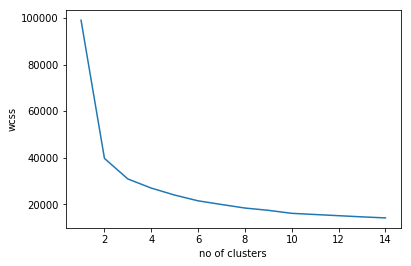

In [210]:
plt.plot(range(1,15),wcss)
plt.show
plt.ylabel('wcss')
plt.xlabel('no of clusters')


## So clusters of 2 would be the best fit

In [211]:
# set number of clusters
kclusters = 2

#venue_grouped_clustering = venue_df_hot_grouped.drop('Neighbourhood Name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(temp_combined_df)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [212]:
temp_combined_df.shape


(409, 14)

In [213]:
combined_cities_df.shape

(409, 19)

In [214]:
combined_cities_df.insert(0,'Cluster Label',kmeans.labels_)

In [217]:
combined_cities_df[combined_cities_df['Cluster Label']==0]

,Cluster Label,Borough,Neighborhood,Lat,Lon,Bar,Business,Entertainment,FastFood,Kids,Parks,Residential,Restaurant,Indian Restaurant,Services,Shops,SightSeeing,Sports,Travel,City
0,0,Bronx,Wakefield,40.894705,-73.847201,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,NYC
1,0,Bronx,Co-op City,40.874294,-73.829939,0.0,0.0,0.0,2.0,0.0,0.0,4.0,2.0,0.0,1.0,5.0,0.0,0.0,2.0,NYC
2,0,Bronx,Eastchester,40.887556,-73.827806,0.0,0.0,1.0,5.0,0.0,0.0,2.0,9.0,0.0,2.0,0.0,0.0,0.0,4.0,NYC
3,0,Bronx,Fieldston,40.895437,-73.905643,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NYC
4,0,Bronx,Riverdale,40.890834,-73.912585,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NYC
6,0,Manhattan,Marble Hill,40.876551,-73.910660,0.0,0.0,0.0,3.0,1.0,0.0,7.0,6.0,0.0,2.0,5.0,0.0,0.0,0.0,NYC
7,0,Bronx,Woodlawn,40.898273,-73.867315,2.0,0.0,2.0,5.0,0.0,0.0,8.0,4.0,1.0,0.0,2.0,0.0,0.0,1.0,NYC
8,0,Bronx,Norwood,40.877224,-73.879391,0.0,0.0,0.0,7.0,0.0,0.0,7.0,7.0,0.0,3.0,2.0,0.0,1.0,1.0,NYC
9,0,Bronx,Williamsbridge,40.881039,-73.857446,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NYC
10,0,Bronx,Baychester,40.866858,-73.835798,0.0,0.0,1.0,5.0,2.0,0.0,4.0,3.0,0.0,0.0,4.0,1.0,0.0,1.0,NYC


## So, by looking into the above table, it's clear that, this cluster is more of residential type with not much infested with commercial activity. So, the neighborhoods of NYC and TORONTO listed in the above table can be suitable for new markets or residential

# Now let's look into Cluster =1

In [218]:
combined_cities_df[combined_cities_df['Cluster Label']==1]

,Cluster Label,Borough,Neighborhood,Lat,Lon,Bar,Business,Entertainment,FastFood,Kids,Parks,Residential,Restaurant,Indian Restaurant,Services,Shops,SightSeeing,Sports,Travel,City
5,1,Bronx,Kingsbridge,40.881687,-73.902818,6.0,0.0,1.0,22.0,2.0,0.0,10.0,16.0,0.0,5.0,9.0,0.0,0.0,1.0,NYC
16,1,Bronx,Fordham,40.860997,-73.896427,0.0,0.0,1.0,25.0,4.0,0.0,16.0,16.0,0.0,14.0,12.0,1.0,0.0,0.0,NYC
34,1,Bronx,Belmont,40.857277,-73.888452,3.0,0.0,0.0,29.0,1.0,0.0,8.0,36.0,0.0,4.0,11.0,0.0,0.0,1.0,NYC
46,1,Brooklyn,Bay Ridge,40.625801,-74.030621,7.0,0.0,1.0,20.0,2.0,1.0,5.0,32.0,1.0,12.0,12.0,0.0,0.0,1.0,NYC
49,1,Brooklyn,Greenpoint,40.730201,-73.954241,20.0,1.0,3.0,21.0,0.0,0.0,11.0,23.0,1.0,2.0,17.0,0.0,0.0,1.0,NYC
59,1,Brooklyn,Prospect Heights,40.676822,-73.964859,18.0,0.0,2.0,13.0,1.0,2.0,8.0,32.0,0.0,0.0,6.0,0.0,0.0,0.0,NYC
62,1,Brooklyn,Bushwick,40.698116,-73.925258,10.0,0.0,1.0,13.0,2.0,0.0,7.0,28.0,1.0,6.0,6.0,0.0,0.0,0.0,NYC
64,1,Brooklyn,Brooklyn Heights,40.695864,-73.993782,6.0,0.0,3.0,13.0,3.0,1.0,25.0,28.0,2.0,4.0,10.0,2.0,3.0,0.0,NYC
65,1,Brooklyn,Cobble Hill,40.687920,-73.998561,15.0,0.0,2.0,12.0,2.0,1.0,14.0,36.0,1.0,2.0,14.0,0.0,1.0,0.0,NYC
66,1,Brooklyn,Carroll Gardens,40.680540,-73.994654,15.0,0.0,3.0,22.0,3.0,1.0,12.0,26.0,0.0,4.0,13.0,0.0,1.0,0.0,NYC


## It's prudent that, by looking into the above table, the above cluster is more of commercial areas in NYC and TORONTO which is suited for opening any commercial activities and the neighborhoods are look alike

# Conclusion

In [229]:
conc_df = combined_cities_df.groupby(['Cluster Label','City','Neighborhood'],as_index=False).agg(','.join)

In [232]:
conc_df = conc_df.drop('Borough',axis=1)

In [235]:
Final_Result = conc_df.groupby(['Cluster Label','City'],as_index=False).agg(','.join)

# Here you go with the final table which shows the Neighborhoods which are similar in NYC and TORONTO. 

## 0 refers to Residential areas and 1 refers to commercial areas which look alike between NYC and TORONTO

In [240]:
pd.set_option('display.max_colwidth', -1)
Final_Result

,Cluster Label,City,Neighborhood
0,0,NYC,"Allerton,Annadale,Arden Heights,Arlington,Arrochar,Arverne,Astoria Heights,Auburndale,Bay Terrace,Baychester,Bayswater,Bedford Park,Bedford Stuyvesant,Beechhurst,Bellaire,Belle Harbor,Bellerose,Bensonhurst,Bergen Beach,Blissville,Bloomfield,Borough Park,Breezy Point,Briarwood,Brighton Beach,Broad Channel,Broadway Junction,Bronxdale,Brookville,Brownsville,Bulls Head,Butler Manor,Cambria Heights,Canarsie,Castle Hill,Castleton Corners,Central Harlem,Charleston,City Island,City Line,Claremont Village,Clason Point,Clifton,Co-op City,College Point,Concord,Concourse,Concourse Village,Coney Island,Corona,Country Club,Crown Heights,Cypress Hills,Ditmas Park,Dongan Hills,Douglaston,Dyker Heights,East Elmhurst,East Flatbush,East Harlem,East New York,East Tremont,Eastchester,Edenwald,Edgemere,Edgewater Park,Egbertville,Elm Park,Eltingville,Emerson Hill,Erasmus,Far Rockaway,Fieldston,Flatbush,Flatlands,Floral Park,Forest Hills,Forest Hills Gardens,Fox Hills,Fresh Meadows,Fulton Ferry,Georgetown,Gerritsen Beach,Glen Oaks,Glendale,Graniteville,Grant City,Grasmere,Gravesend,Great Kills,Greenridge,Grymes Hill,Hammels,Heartland Village,High Bridge,Highland Park,Hillcrest,Hollis,Holliswood,Homecrest,Howard Beach,Howland Hook,Hudson Yards,Huguenot,Hunts Point,Jamaica Center,Jamaica Estates,Jamaica Hills,Kensington,Kew Gardens,Kew Gardens Hills,Kingsbridge Heights,Laurelton,Lefrak City,Lighthouse Hill,Lindenwood,Longwood,Madison,Malba,Manhattan Beach,Manhattan Terrace,Manhattanville,Manor Heights,Marble Hill,Marine Park,Mariner's Harbor,Maspeth,Melrose,Middle Village,Midland Beach,Midwood,Mill Basin,Mill Island,Morningside Heights,Morris Heights,Morris Park,Morrisania,Mott Haven,Mount Eden,Mount Hope,Neponsit,New Brighton,New Dorp,New Dorp Beach,New Lots,New Springville,North Corona,North Riverdale,Norwood,Oakland Gardens,Oakwood,Ocean Hill,Ocean Parkway,Old Town,Olinville,Ozone Park,Paerdegat Basin,Park Hill,Parkchester,Pelham Bay,Pelham Gardens,Pelham Parkway,Pleasant Plains,Pomonok,Port Ivory,Port Morris,Port Richmond,Prince's Bay,Prospect Lefferts Gardens,Prospect Park South,Queens Village,Queensboro Hill,Queensbridge,Randall Manor,Ravenswood,Red Hook,Rego Park,Remsen Village,Richmond Hill,Richmond Town,Richmond Valley,Ridgewood,Riverdale,Rochdale,Rockaway Beach,Rockaway Park,Roosevelt Island,Rosebank,Rosedale,Rossville,Roxbury,Rugby,Sandy Ground,Schuylerville,Sea Gate,Sheepshead Bay,Shore Acres,Silver Lake,Somerville,Soundview,South Beach,South Jamaica,South Ozone Park,Springfield Gardens,Spuyten Duyvil,St. Albans,St. George,Stapleton,Starrett City,Steinway,Stuyvesant Town,Sunset Park,Throgs Neck,Todt Hill,Tompkinsville,Tottenville,Travis,Unionport,University Heights,Utopia,Van Nest,Vinegar Hill,Wakefield,Weeksville,West Brighton,West Farms,Westchester Square,Westerleigh,Whitestone,Williamsbridge,Williamsburg,Willowbrook,Windsor Terrace,Wingate,Woodhaven,Woodlawn,Woodrow"
1,0,TORONTO,"Agincourt,Agincourt North, L'Amoreaux East, Milliken, Steeles East,Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown,Alderwood, Long Branch,Bathurst Manor, Downsview North, Wilson Heights,Bayview Village,Bedford Park, Lawrence Manor East,Birch Cliff, Cliffside West,Bloordale Gardens, Eringate, Markland Wood, Old Burnhamthorpe,Brockton, Exhibition Place, Parkdale Village,Business Reply Mail Processing Centre 969 Eastern,CFB Toronto, Downsview East,CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara,Cabbagetown, St. James Town,Caledonia-Fairbanks,Canada Post Gateway Processing Centre,Cedarbrae,Christie,Clairlea, Golden Mile, Oakridge,Clarks Corners, Sullivan, Tam O'Shanter,Cliffcrest, Cliffside, Scarborough Village West,Cloverdale, Islington, Martin Grove, Princess Gardens, West Deane Park,Davisville,Davisville North,Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West,Del Ray, Keelesdale, Mount D

In [238]:
Final_Result.to_csv('final_result.csv',index=False)